# Application of Machine Learning Models to Nigeria Malaria Data

This notebook use the Nigeria Malaria Indicator Survey (NMIS) dataset to create a prediction model that predict which people are likely to indicate having access to mosquito bed net for sleeping as a malaria prevention strategy.

Import some basic libraries.
Pandas - provided data frames
numpy - for numeric operations.
matplotlib.pyplot - plotting support
Use Magic %matplotlib to display graphics inline instead of in a popup window.

In [15]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#load data
Malaria = pd.read_csv('Numeric Malaria Data.csv')

In [17]:
Malaria.head()

,hhid,hv024,hv025,hv201,hv205,hv206,hv213,hv214,hv215,hv210,hv211,hv212,hv227,hv244,hv247,hv270,sh16_22,shstate
0,1002,3,1,31,21.0,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21.0,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21.0,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21.0,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21.0,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [18]:
Malaria = pd.read_csv('Numeric Malaria Data.csv')
Malaria.columns=['Case Identification', 'Region', 'Type of Place of Residence', 'Source of Drinking Water', 'Type of Toilet Facility',
                'Has Electricity', 'Main Floor Material', 'Main Wall Material', 'Main Roof Material', 'Has Bicycle', 'Has Motorcycle/Scooter',
                'Has Car/Truck', 'Has Mosquito Bed Net for Sleeping', 'Owns Land Suitable for Agriculture', 'Has Bank Account', 
                'Wealth Index', 'Cost of Treatment for Fever', 'State']

print(Malaria.shape)
Malaria.head()

(7745, 18)


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,Cost of Treatment for Fever,State
0,1002,3,1,31,21.0,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21.0,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21.0,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21.0,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21.0,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [19]:
Malaria.columns=[str.replace('/','or') for str in Malaria.columns]

In [22]:
Malaria.astype (np.object).isnull().any()

Case Identification                   False
Region                                False
Type of Place of Residence            False
Source of Drinking Water              False
Type of Toilet Facility                True
Has Electricity                       False
Main Floor Material                   False
Main Wall Material                    False
Main Roof Material                    False
Has Bicycle                           False
Has MotorcycleorScooter               False
Has CarorTruck                        False
Has Mosquito Bed Net for Sleeping     False
Owns Land Suitable for Agriculture    False
Has Bank Account                      False
Wealth Index                          False
Cost of Treatment for Fever            True
State                                 False
dtype: bool

In [23]:
Malaria.drop('Type of Toilet Facility', axis=1, inplace=True)

In [24]:
Malaria.drop('Cost of Treatment for Fever', axis=1, inplace=True)

In [25]:
Malaria.head()

,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
0,1002,3,1,31,1,34,31,31,0,0,0,1,1,0,4,10
1,1004,3,1,61,1,22,31,31,1,0,1,1,1,1,4,10
2,1007,3,1,21,1,34,31,31,0,1,0,1,0,0,4,10
3,1010,3,1,21,1,34,31,31,1,1,1,1,0,0,5,10
4,1013,3,1,61,1,33,31,31,0,1,1,1,0,1,5,10


In [26]:
Malaria.tail()

,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
7740,333108,6,2,21,1,34,31,36,0,0,0,1,0,1,5,370
7741,333113,6,2,72,1,34,31,36,0,0,0,1,0,1,5,370
7742,333119,6,2,72,1,33,31,36,0,0,0,0,0,1,5,370
7743,333124,6,2,21,1,34,31,36,0,1,0,1,1,1,5,370
7744,333129,6,2,72,1,35,31,36,0,0,1,1,0,1,5,370


In [27]:
def plot_corr(Malaria, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        Malaria: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = Malaria.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


# Correlated Feature Check. 

Correlation by color. Red is most correlated with other variable, Yellow is self to self correlated and Blue is least correlated with other variable.

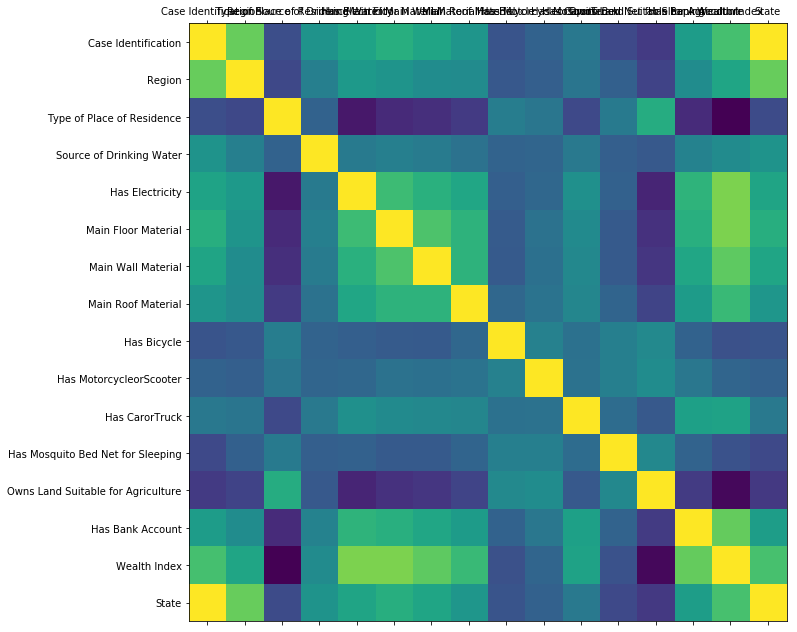

In [28]:
plot_corr(Malaria)

State and Case Identification appears to be correlated.

Drop State Column

In [29]:
del Malaria ['State']

In [30]:
Malaria.head(5)

,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index
0,1002,3,1,31,1,34,31,31,0,0,0,1,1,0,4
1,1004,3,1,61,1,22,31,31,1,0,1,1,1,1,4
2,1007,3,1,21,1,34,31,31,0,1,0,1,0,0,4
3,1010,3,1,21,1,34,31,31,1,1,1,1,0,0,5
4,1013,3,1,61,1,33,31,31,0,1,1,1,0,1,5


In [31]:
Malaria.corr()

,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index
Case Identification,1.000000,0.638409,-0.177266,0.242676,0.346377,0.418109,0.357156,0.258999,-0.146223,-0.065743,0.069666,-0.209099,-0.287561,0.308290,0.539692
Region,0.638409,1.000000,-0.216489,0.114729,0.289712,0.249819,0.204138,0.195965,-0.126653,-0.079921,0.050046,-0.076920,-0.239670,0.202319,0.362222
Type of Place of Residence,-0.177266,-0.216489,1.000000,-0.062668,-0.451181,-0.369315,-0.343694,-0.290769,0.105237,0.059444,-0.207979,0.081198,0.406885,-0.362743,-0.552373
Source of Drinking Water,0.242676,0.114729,-0.062668,1.000000,0.083321,0.114668,0.094403,0.032614,-0.056048,-0.046185,0.076336,-0.082932,-0.119719,0.133601,0.194949
Has Electricity,0.346377,0.289712,-0.451181,0.083321,1.000000,0.510600,0.433182,0.368053,-0.080331,-0.035021,0.227692,-0.068400,-0.394045,0.459657,0.695772
Main Floor Material,0.418109,0.249819,-0.369315,0.114668,0.510600,1.000000,0.564095,0.452509,-0.105225,0.032129,0.191956,-0.115477,-0.331080,0.426058,0.692384
Main Wall Material,0.357156,0.204138,-0.343694,0.094403,0.433182,0.564095,1.000000,0.453377,-0.110117,0.023289,0.174703,-0.111986,-0.308910,0.363704,0.614118
Main Roof Material,0.258999,0.195965,-0.290769,0.032614,0.368053,0.452509,0.453377,1.000000,-0.036135,0.041197,0.160614,-0.053217,-0.234329,0.297131,0.498227
Has Bicycle,-0.146223,-0.126653,0.105237,-0.056048,-0.080331,-0.105225,-0.110117,-0.036135,1.000000,0.132240,0.029424,0.116814,0.176735,-0.064909,-0.165187
Has MotorcycleorScooter,-0.065743,-0.079921,0.059444,-0.046185,-0.035021,0.032129,0.023289,0.041197,0.132240,1.000000,0.035229,0.118703,0.202835,0.065937,-0.046922


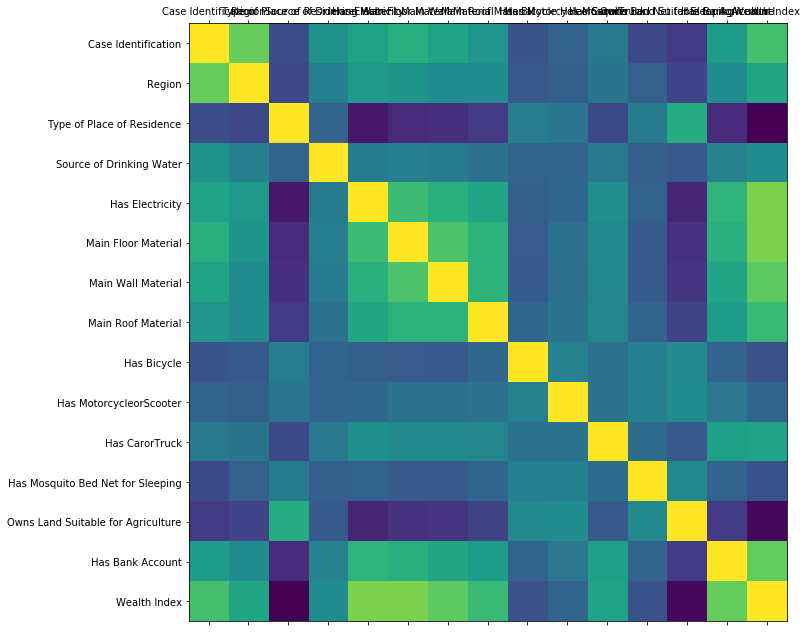

In [32]:
plot_corr(Malaria)

The correlations look good. There appear to be no coorelated columns.

# Check class distribution

In [33]:
num_obs = len(Malaria)
num_true = len(Malaria.loc[Malaria['Has Mosquito Bed Net for Sleeping'] == 1])
num_false = len(Malaria.loc[Malaria['Has Mosquito Bed Net for Sleeping'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  5432 (70.14%)
Number of False cases: 2313 (29.86%)


Our class distribution is fairly good.

# Spliting the data
70% for training, 30% for testing

In [34]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_col_names = ['Region', 'Type of Place of Residence', 'Source of Drinking Water', 'Has Electricity', 'Wealth Index', 'Has Bicycle', 'Has MotorcycleorScooter', 'Has CarorTruck' , 'Owns Land Suitable for Agriculture', 'Has Bank Account' , 'Main Floor Material' ,'Main Wall Material' , 'Main Roof Material']
predicted_class_names = ['Has Mosquito Bed Net for Sleeping']

X = Malaria[feature_col_names].values     # predictor feature columns (8 X m)
y = Malaria[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

We check to ensure we have the the desired 70% train, 30% test split of the data.

In [35]:
print("{0:0.2f}% in training set".format((len(X_train)/len(Malaria.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(Malaria.index)) * 100))

69.99% in training set
30.01% in test set


Verifying predicted value was split correctly.

In [36]:
print("Original True  : {0} ({1:0.2f}%)".format(len(Malaria.loc[Malaria['Has Mosquito Bed Net for Sleeping'] == 1]), (len(Malaria.loc[Malaria['Has Mosquito Bed Net for Sleeping'] == 1])/len(Malaria.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(Malaria.loc[Malaria['Has Mosquito Bed Net for Sleeping'] == 0]), (len(Malaria.loc[Malaria['Has Mosquito Bed Net for Sleeping'] == 0])/len(Malaria.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 5432 (70.14%)
Original False : 2313 (29.86%)

Training True  : 3788 (69.88%)
Training False : 1633 (30.12%)

Test True      : 1644 (70.74%)
Test False     : 680 (29.26%)


# Training Initial Algorithm - Using Naive Bayes Machine Learning Model

In [37]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

Performance on Training Data

In [38]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.6336



Our accurancy rate is 63% on the training data. This is below the 70% benchmark for our ideal ML Model.

Performance on Testing Data

In [39]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("nb_predict_test", nb_predict_test)
print ("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))


nb_predict_test [1 0 1 ... 1 0 0]
y_test [[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]
Accuracy: 0.6364


In [ ]:
Accuracy on testing data is also below our 70% benchmark.

In [44]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))


Confusion Matrix
[[ 331  349]
 [ 496 1148]]

Classification Report
             precision    recall  f1-score   support

          0       0.40      0.49      0.44       680
          1       0.77      0.70      0.73      1644

avg / total       0.66      0.64      0.65      2324



Our Recall and Precision rate is 70% and 77% respectively. This is ok. However we would try other models if they would work better.

# Using Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Predict Training Data

In [46]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.8904


Random Forest Accuracy level looks much better.

Predict Test Data

In [47]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.6807


But this is slightly below 70% for our test data.

In [48]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[ 276  404]
 [ 338 1306]]

Classification Report
             precision    recall  f1-score   support

          0       0.45      0.41      0.43       680
          1       0.76      0.79      0.78      1644

avg / total       0.67      0.68      0.68      2324



Our precision and Recall recorded good values based on true 'Yes' and 'No' for ownership of Mosquito Bed Net for Sleeping though the accuracy level on the test data is slightly less than our 70% benchmark.

# Using Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7027
[[  37  643]
 [  48 1596]]

Classification Report
             precision    recall  f1-score   support

          0       0.44      0.05      0.10       680
          1       0.71      0.97      0.82      1644

avg / total       0.63      0.70      0.61      2324



Logistic Regression Model performed best for our prediction. So we would finally go with the Logistics Regression Model.

# Using our trained Model (Logistic Regression)

Save trained model to file

In [108]:
from sklearn.externals import joblib  
joblib.dump(lr_model, "Malaria LR Model")


['Malaria LR Model']

Load trained model from file

In [109]:
lr_model = joblib.load("Malaria LR Model")

Test Prediction on data

Once the model is loaded we can use it to predict on some data. In this case our test data contains a few rows from the original 'Numeric Malaria Data.csv'

In [110]:
# get data from 'numeric malaria testing data' file
Malaria_predict = pd.read_csv("numeric malaria testing data.csv")
Malaria_predict

,hhid,hv024,hv025,hv201,hv205,hv206,hv213,hv214,hv215,hv210,hv211,hv212,hv227,hv244,hv247,hv270,sh16_22,shstate
0,1002,3,1,31,21,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21,1,33,31,31,0,1,1,1,0,1,5,NaN,10


These are few rows from our original data for testing purpose. We would quickly do some data cleaning as we did before.

In [111]:
Malaria_predict = pd.read_csv('numeric malaria testing data.csv')
Malaria_predict.columns=['Case Identification', 'Region', 'Type of Place of Residence', 'Source of Drinking Water', 'Type of Toilet Facility',
                'Has Electricity', 'Main Floor Material', 'Main Wall Material', 'Main Roof Material', 'Has Bicycle', 'Has Motorcycle/Scooter',
                'Has Car/Truck', 'Has Mosquito Bed Net for Sleeping', 'Owns Land Suitable for Agriculture', 'Has Bank Account', 
                'Wealth Index', 'Cost of Treatment for Fever', 'State']

print(Malaria_predict.shape)
Malaria_predict.head()

(5, 18)


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,Cost of Treatment for Fever,State
0,1002,3,1,31,21,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [112]:
Malaria_predict.columns=[str.replace('/','or') for str in Malaria_predict.columns]

In [113]:
Malaria_predict.drop('Type of Toilet Facility', axis=1, inplace=True)

In [114]:
Malaria_predict.drop('Cost of Treatment for Fever', axis=1, inplace=True)

In [115]:
Malaria_predict.drop('Case Identification', axis=1, inplace=True)

In [116]:
Malaria_predict.drop('State', axis=1, inplace=True)

In [117]:
Malaria_predict

,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index
0,3,1,31,1,34,31,31,0,0,0,1,1,0,4
1,3,1,61,1,22,31,31,1,0,1,1,1,1,4
2,3,1,21,1,34,31,31,0,1,0,1,0,0,4
3,3,1,21,1,34,31,31,1,1,1,1,0,0,5
4,3,1,61,1,33,31,31,0,1,1,1,0,1,5


We need to drop the 'Has Mosquito Bed Net for Sleeping' column since that is what we are predicting.
Store data without the column with the prefix X as we did with the X_train and X_test to indicate that it contains only the columns we are prediction.

In [118]:
X_predict = Malaria_predict
del X_predict['Has Mosquito Bed Net for Sleeping']

In [119]:
X_predict

,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index
0,3,1,31,1,34,31,31,0,0,0,1,0,4
1,3,1,61,1,22,31,31,1,0,1,1,1,4
2,3,1,21,1,34,31,31,0,1,0,0,0,4
3,3,1,21,1,34,31,31,1,1,1,0,0,5
4,3,1,61,1,33,31,31,0,1,1,0,1,5


At this point our data is ready to be used for prediction.

Predict 'Has Mosquito Bed Net for Sleeping' with the prediction data. Returns 1 if True, 0 if false

In [120]:
lr_model.predict(X_predict)

array([1, 1, 1, 1, 1])

Our Model predict well. Mision Accomplished!!